In [60]:
%matplotlib inline

In [61]:
from matplotlib import pyplot as plt

In [62]:
import numpy as np

In [63]:
# each parameter is length, width, type(0=blue,1=red)
data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5, 1,   1],
        [1,   1,   0]]

mystery_flower = [4.5, 1]

In [64]:
data[0][2]

1

In [65]:
# network
# w1,w2,b

#w1 = np.random.randn()
#w1
#w2 = np.random.randn()
#w2
#b = np.random.randn()
#b

In [66]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_p(x):
    #derivative of sigmoid function
    return sigmoid(x) * (1-sigmoid(x))

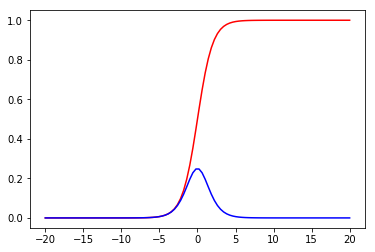

In [67]:
T = np.linspace(-20, 20, 100)
plt.plot(T, sigmoid(T), c='r')
plt.plot(T, sigmoid_p(T), c='b')

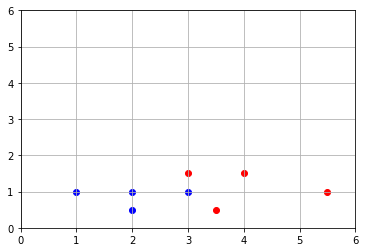

In [68]:
# scatter data

# xmi,xmax,ymin,ymax
plt.axis([0,6,0,6])
plt.grid()
for i in range(len(data)):
    point = data[i]
    color = "r"
    if point[2] == 0:
        color = "b"
    plt.scatter(point[0],point[1],c=color)

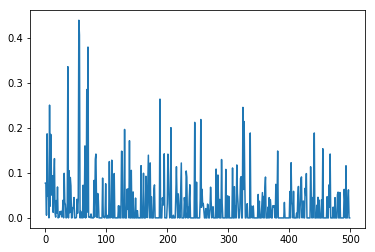

In [69]:
# training loop

learning_rate = 0.2
costs = []

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

for i in range(50000):
    ri = np.random.randint(len(data))
    point = data[ri]
    
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    
    target = point[2]
    cost = np.square(pred-target)
    
    #costs.append(cost)
    
    dcost_pred = 2 * (pred-target)
    dpred_dz = sigmoid_p(z)
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1
    
    dcost_dz = dcost_pred * dpred_dz
    
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db
    
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db
    
    if i%100 == 0:
        cost_sum = 0
        for j in range(len(data)):
            point = data[ri]
            
            z = point[0] * w1 + point[1] * w2 + b
            pred = sigmoid(z)
            
            target = point[2]
            cost_sum += np.square(pred - target)
        
        costs.append(cost_sum/len(data))
        
plt.plot(costs)

In [70]:
# Checking model predictiona

for i in range(len(data)):
    point = data[i]
    print(point)
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    print('pred:{}'.format(pred))
    #print('pred: %lf' % pred)

[3, 1.5, 1]
pred:0.8015940287530358
[2, 1, 0]
pred:0.00073227246977285
[4, 1.5, 1]
pred:0.9997826565205027
[3, 1, 0]
pred:0.45484880729455107
[3.5, 0.5, 1]
pred:0.8532447784069218
[2, 0.5, 0]
pred:0.00015131273624957337
[5.5, 1, 1]
pred:0.9999999725999237
[1, 1, 0]
pred:6.436226473731388e-07


In [82]:
#prediction of the model for mystery flower
z = mystery_flower[0] * w1 + mystery_flower[1] * w2 + b
pred = sigmoid(z)
pred

0.9999688041024535

In [99]:
def which_flower(length, width):
    z = length * w1 + width * w2 + b
    pred = sigmoid(z)
    if pred < .5:
        print('The flower is blue')
        print(pred)
    else:
        print('The flower is red')
        print(pred)

In [103]:
# mystery flower
which_flower(4.5,1)
# pi flower
which_flower(np.pi,np.pi)
# e flower
which_flower(np.e,np.e)

The flower is red
0.9999688041024535
The flower is red
0.9994853952567736
The flower is red
0.9629269360053544
